# Loading Dataset

In [0]:
import sklearn.datasets
import numpy as np

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
type(breast_cancer)

sklearn.utils.Bunch

In [0]:
x = breast_cancer.data
y = breast_cancer.target

In [5]:
type(x)

numpy.ndarray

In [6]:
x.shape, y.shape

((569, 30), (569,))

In [7]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame(breast_cancer.data,columns = breast_cancer.feature_names)

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
df['class'] = breast_cancer.target

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
df.shape

(569, 31)

In [14]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [15]:
df['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [16]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [17]:
df.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Split Data

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x = df.drop('class',axis = 1)
y = df['class']

In [0]:
x_train,x_test, y_train,y_test = train_test_split(x,y)

In [21]:
x_train.shape

(426, 30)

In [22]:
x_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,0.3416,1.3120,2.275,20.98,0.010980,0.01257,0.01031,0.003934,0.02693,0.002979,11.15,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875
528,13.940,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.066150,0.1976,0.06457,0.5461,2.6350,4.091,44.74,0.010040,0.03247,0.04763,0.028530,0.01715,0.005528,14.62,15.38,94.52,653.3,0.1394,0.1364,0.15590,0.10150,0.2160,0.07253
220,13.650,13.16,87.88,568.9,0.09646,0.08711,0.03888,0.025630,0.1360,0.06344,0.2102,0.4336,1.391,17.40,0.004133,0.01695,0.01652,0.006659,0.01371,0.002735,15.34,16.35,99.71,706.2,0.1311,0.2474,0.17590,0.08056,0.2380,0.08718
62,14.250,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.086530,0.1949,0.07292,0.7036,1.2680,5.373,60.78,0.009407,0.07056,0.06899,0.018480,0.01700,0.006113,17.67,29.51,119.10,959.5,0.1640,0.6247,0.69220,0.17850,0.2844,0.11320
203,13.810,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.091760,0.2251,0.07421,0.5648,1.9300,3.909,52.72,0.008824,0.03108,0.03112,0.012910,0.01998,0.004506,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860


In [23]:
x_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,13.845413,19.216620,90.018826,624.886620,0.095786,0.101691,0.083923,0.046268,0.180658,0.062852,0.389676,1.226937,2.773620,36.652005,0.007136,0.025371,0.031955,0.011870,0.020524,0.003825,15.885838,25.550657,104.695798,832.952582,0.131688,0.245080,0.262393,0.111075,0.287950,0.083400
std,3.268113,4.211651,22.443059,309.445764,0.013786,0.050135,0.073917,0.035673,0.027889,0.007109,0.230211,0.574439,1.696108,31.436865,0.003112,0.017751,0.031931,0.006482,0.008242,0.002830,4.483784,6.064944,31.082704,504.764390,0.022038,0.143584,0.198292,0.062742,0.059824,0.017018
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.114400,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.602500,16.092500,74.262500,410.400000,0.086443,0.065525,0.029240,0.020103,0.161525,0.057682,0.232900,0.836950,1.648250,18.067500,0.005172,0.013455,0.014693,0.007621,0.014960,0.002218,12.850000,20.992500,83.625000,506.450000,0.117025,0.147325,0.112975,0.064943,0.250050,0.071318
50%,13.310000,18.770000,85.980000,544.600000,0.095200,0.090435,0.059105,0.032935,0.177600,0.061545,0.323950,1.139500,2.285500,24.610000,0.006431,0.019960,0.025580,0.010815,0.018765,0.003103,14.845000,25.335000,96.675000,674.950000,0.131350,0.210700,0.221300,0.098380,0.281100,0.079900
75%,15.460000,21.695000,102.475000,742.750000,0.104400,0.127975,0.120125,0.066322,0.196350,0.066350,0.464350,1.473750,3.216500,43.490000,0.008324,0.031992,0.041403,0.014975,0.023797,0.004547,17.962500,29.410000,121.350000,987.825000,0.144600,0.313225,0.365475,0.155275,0.313225,0.091865
max,25.220000,39.280000,171.500000,1878.000000,0.163400,0.345400,0.426400,0.184500,0.304000,0.095750,1.370000,4.885000,11.070000,199.700000,0.031130,0.106400,0.396000,0.052790,0.078950,0.029840,32.490000,49.540000,214.000000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.577400,0.207500


In [24]:
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (426, 30) (143, 30)


In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [26]:
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (512, 30) (57, 30)


In [27]:
print(y.mean(),y_train.mean(),y_test.mean())

0.6274165202108963 0.642578125 0.49122807017543857


Maintaining class ratios in train and test split as in the main dataset as much as possible.

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify=y)

In [29]:
print(y.mean(),y_train.mean(),y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


To have same split always (so that results are reproducible in future runs of the algorithm), we need to send random state argument, which is also referred to as seed of the splitter. The state doesn't matter. 

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)

# Binarisation of input

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Each feature represented by a different color, with the samples over the x-axis.

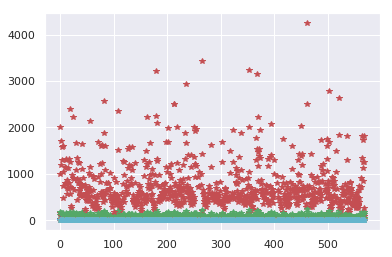

In [32]:
plt.plot(x_train,'*')
plt.show()

Plotting the transpose of training set. Will showcase the different values for each feature i.e. the spread for each feature of the training set.

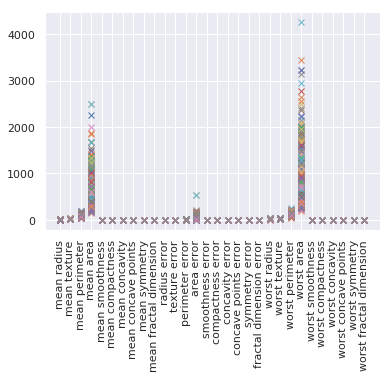

In [33]:
plt.plot(x_train.T, 'x')
plt.xticks(rotation='vertical')
plt.show()

To binarise we can select a threshold value, above which the feature can take the value of 1, and below which it can take 0. The value can be the mean or median. 

In [0]:
sample_col = x_train['mean area'].map(lambda x: 1 if x<1000 else 0)

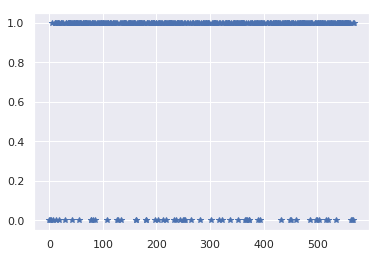

In [35]:
plt.plot(sample_col,'*')
plt.show()

Not required to do it manually for each column of the dataframe, can be done using the cut function of the pandas module, which splits the column values into given number of bins with given set of labels.

In [0]:
pd.cut?

In [0]:
x_btrain = x_train.apply(pd.cut,bins=2,labels=[1,0])

In [0]:
x_btest = x_test.apply(pd.cut,bins=2,labels=[1,0])

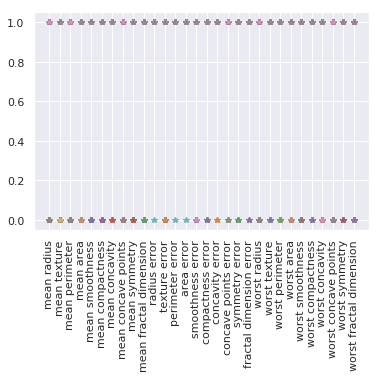

In [38]:
plt.plot(x_btrain.T,'*')
plt.xticks(rotation='vertical')
plt.savefig('Binarised Input.png')
plt.show()


In [0]:
x_btrain = x_btrain.values

In [0]:
x_btest = x_btest.values

# MPNeuron

In [0]:
from random import randint

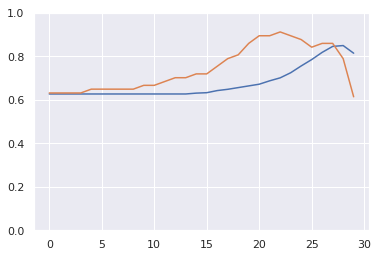

In [98]:
y_train_preds = []
optimal_train_b = 0
max_train_accuracy = 0

train_accuracies = []
for b in range(x_btrain.shape[1]):
  correct = 0
  for x,y in zip(x_btrain,y_train):
    y_pred = (np.sum(x)>=b)
    y_preds.append(y_pred)
    if y_pred==y:
      correct+=1
  accuracy = correct/x_btrain.shape[0]
  train_accuracies.append(accuracy)
  if accuracy>max_accuracy:
    max_accuracy = accuracy
    optimal_b = b
  # print(b,accuracy)

y_test_preds = []
optimal_test_b = 0
max_test_accuracy = 0

test_accuracies = []
for b in range(x_btest.shape[1]):
  correct = 0
  for x,y in zip(x_btest,y_test):
    y_pred = (np.sum(x)>=b)
    y_preds.append(y_pred)
    if y_pred==y:
      correct+=1
  accuracy = correct/x_btest.shape[0]
  test_accuracies.append(accuracy)
  if accuracy>max_accuracy:
    max_accuracy = accuracy
    optimal_b = b
  # print(b,accuracy)


# fig, axs = plt.subplots(2)
# fig.suptitle('Training and Testing Accuracies compared')
# axs[0].plot(list(range(b+1)),train_accuracies)
# axs[1].plot(list(range(b+1)),test_accuracies)

plt.plot(train_accuracies)
plt.plot(test_accuracies)
plt.ylim([0,1])
plt.show()

In [99]:
print(optimal_b, max_accuracy)

22 0.9122807017543859


In [100]:
correct = 0
y_pred_test = []
for x,y in zip(x_btest,y_test):
  y_pred = (np.sum(x)>=optimal_b)
  y_pred_test.append(y_pred)
  if y_pred==y:
    correct+=1
  
print("test accuracy = ", correct/x_btest.shape[0])

test accuracy =  0.9122807017543859


In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy = accuracy_score(y_pred_test,y_test)

In [103]:
accuracy

0.9122807017543859

#MP Neuron Class

In [0]:
class MPNeuron:

  def __init__(self):
    self.b = None

  def model(self,x):
    return np.sum(x)>=self.b
  
  def predict(self,X):
    y_pred = []
    for x in X:
      result = self.model(x)
      y_pred.append(result)
    return np.array(y_pred)

  def fit(self,X,Y):
    accuracy = {}

    for b in range(X.shape[1]):
      self.b = b
      accuracy[b] = accuracy_score(self.predict(X),Y)
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b

    print("Optimal b", best_b)
    print("Max accuracy", accuracy[best_b])

  def train_test_analyse(self,X_train,Y_train,X_test,Y_test):
    y_train_preds = []
    y_test_preds = []
    optimal_train_b = 0
    optimal_test_b = 0
    max_train_accuracy = 0
    max_test_accuracy = 0 
    train_accuracies = []
    test_accuracies = []
    for b in range(x_btrain.shape[1]):
      train_correct = 0
      test_correct = 0
      for x,y in zip(x_btrain,y_train):
        y_pred = (np.sum(x)>=b)
        y_train_preds.append(y_pred)
        if y_pred==y:
          train_correct+=1
      accuracy = train_correct/x_btrain.shape[0]
      train_accuracies.append(accuracy)
      if accuracy>max_train_accuracy:
        max_train_accuracy = accuracy
        optimal_train_b = b
      # print(b,accuracy)

      for x,y in zip(x_btest,y_test):
        y_pred = (np.sum(x)>=b)
        y_test_preds.append(y_pred)
        if y_pred==y:
          test_correct+=1
      accuracy = test_correct/x_btest.shape[0]
      test_accuracies.append(accuracy)
      if accuracy>max_test_accuracy:
        max_test_accuracy = accuracy
        optimal_test_b = b

    plt.plot(train_accuracies)
    plt.plot(test_accuracies)
    plt.ylim([0,1])
    plt.show()


In [0]:
mp_neuron = MPNeuron()

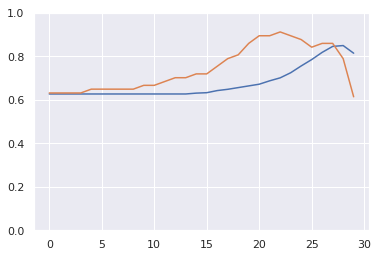

In [121]:
mp_neuron.train_test_analyse(x_btrain,y_train,x_btest,y_test)

In [106]:
mp_neuron.fit(x_btrain,y_train)

Optimal b 28
Max accuracy 0.849609375


In [51]:
print(accuracy_score(mp_neuron.predict(x_btest),y_test))
print(mp_neuron.b)

0.8947368421052632
27


# Perceptron Class

The class contains two hyperparameters, i.e. epochs, and learning rate. The class also contains the use of the concept of checkpoint s to extract the best possible weights correspoding to the highest training accuracy rather than relying on the last epoch for sub-optimal parameters for the model.

Observation : initialisation with 0 gave unstable learning with learning rate,  whereas 1 led to stable learning with learning rate.

In [0]:
class Perceptron:

  def __init__(self):
    self.b = None
    self.w = None

  def model(self,x):
    return np.dot(self.w,x)>=self.b
  
  def predict(self,X):
    y_pred = []

    for x in X:
      result = self.model(x)
      y_pred.append(result)

    return np.array(y_pred)

  def fit(self,X,Y,epochs,lr):

    accuracy = []
    self.b = 0
    self.w = np.ones(X.shape[1])
    max_accuracy = 0

    wt_matrix = []
    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)
        if y==1 and y_pred==0:
          self.w= self.w + lr*x
          self.b= self.b + (lr)*1
        elif y==0 and y_pred==1:
          self.w= self.w - lr*x
          self.b= self.b - (lr)*1     
      plt.plot(self.w)
      latest_accuracy = accuracy_score(self.predict(X),Y)
      accuracy.append(latest_accuracy)
      wt_matrix.append(self.w)
      if latest_accuracy > max_accuracy:
        max_accuracy = latest_accuracy
        checkptw = self.w
        checkptb = self.b

      print("Completed epoch", i+1, ", Training Accuracy:",accuracy_score(self.predict(X),Y))
      print()
    plt.savefig("Weight Transition.png")
    plt.show()

    plt.plot(accuracy)
    plt.ylim([0,1])
    plt.savefig("Accuracy Transition")
    plt.show()

    self.w = checkptw
    self.b = checkptb

    return np.array(wt_matrix)

In [0]:
perceptron = Perceptron()

In [0]:
x_train = x_train.values
x_test = x_test.values

Completed epoch 1 , Training Accuracy: 0.7889447236180904

Completed epoch 2 , Training Accuracy: 0.37185929648241206

Completed epoch 3 , Training Accuracy: 0.7763819095477387

Completed epoch 4 , Training Accuracy: 0.37185929648241206

Completed epoch 5 , Training Accuracy: 0.8668341708542714

Completed epoch 6 , Training Accuracy: 0.8819095477386935

Completed epoch 7 , Training Accuracy: 0.8693467336683417

Completed epoch 8 , Training Accuracy: 0.8819095477386935

Completed epoch 9 , Training Accuracy: 0.8969849246231156

Completed epoch 10 , Training Accuracy: 0.8994974874371859

Completed epoch 11 , Training Accuracy: 0.8894472361809045

Completed epoch 12 , Training Accuracy: 0.8919597989949749

Completed epoch 13 , Training Accuracy: 0.9020100502512562

Completed epoch 14 , Training Accuracy: 0.9020100502512562

Completed epoch 15 , Training Accuracy: 0.9020100502512562

Completed epoch 16 , Training Accuracy: 0.8618090452261307

Completed epoch 17 , Training Accuracy: 0.85678

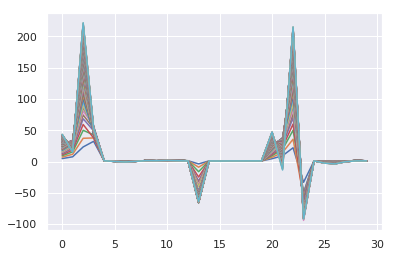

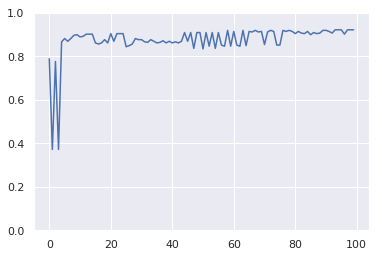

In [84]:
wt_matrix = perceptron.fit(x_train,y_train,100,0.01)

In [85]:
accuracy_score(perceptron.predict(x_train),y_train)

0.9221105527638191

In [86]:
accuracy_score(perceptron.predict(x_test),y_test)

0.935672514619883

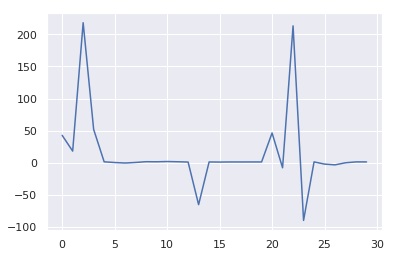

In [87]:
plt.plot(perceptron.w)
plt.savefig("Final Weight Graph for Perceptron")
plt.show()

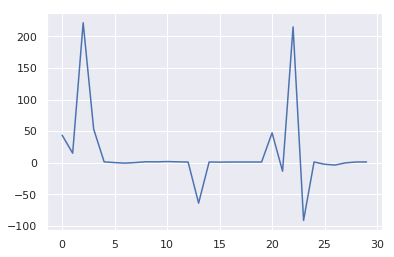

In [88]:
plt.plot(wt_matrix[-1,:])
plt.show()

https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html : Refer for subplots and multiple plots with good handle for each

http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/: Refer for animations in jupyter notebook

In [0]:
%matplotlib inline

In [0]:
from matplotlib import animation, rc
from IPython.display import HTML

In [0]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-1500, 2500))

line, = ax.plot([], [], lw=2)

In [0]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)

In [0]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,frames=100, interval=200, blit=True)

In [0]:
HTML(anim.to_html5_video())